In [ ]:
from transformers import GPT2LMHeadModel

In [ ]:
model_hf = GPT2LMHeadModel.from_pretrained("gpt2") #124M
sd_hf = model_hf.state_dict() #raw tensors

for k,v in sd_hf.items():
  print(k, v.shape)

  #50257 tokens and 768 dimensional-embeddings initially

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [ ]:
sd_hf["transformer.wpe.weight"].view(-1)[:20] # Flattened

tensor([-0.0188, -0.1974,  0.0040,  0.0113,  0.0638, -0.1050,  0.0369, -0.1680,
        -0.0491, -0.0565, -0.0025,  0.0135, -0.0042,  0.0151,  0.0166, -0.1381,
        -0.0063, -0.0461,  0.0267, -0.2042])

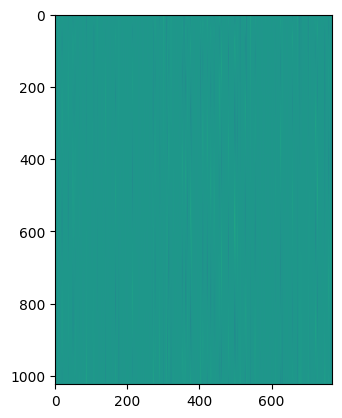

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(sd_hf["transformer.wpe.weight"])
# Every row is the representation of the position between 0-1024
# While processing the rows will get processed by the transformer to recover all relative positions.

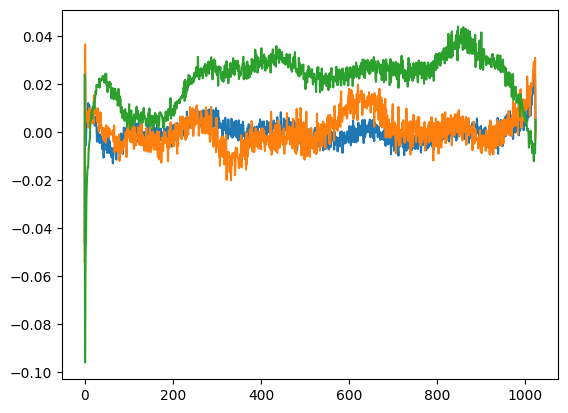

In [ ]:
plt.plot(sd_hf["transformer.wpe.weight"][:,150])
plt.plot(sd_hf["transformer.wpe.weight"][:,200])
plt.plot(sd_hf["transformer.wpe.weight"][:,250])

# The more trained the model is, the smoother it gets
# In the Attention is all you need paper, the positional embeddings were fixed as sinusoids and cosines of different frequencies.
# In gpt-2, these are just parameters, trained from scratch. They recover sinusoidal-like features during optimization.

In [ ]:
from transformers import pipeline, set_seed
generator = pipeline('text-generation', model='gpt2')
set_seed(42)
generator("Hello, I'm a language model,", max_length=30, num_return_sequences=5)
#sampling 30 tokens with 5 sequences

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "Hello, I'm a language model, but what I'm really doing is making a human-readable document. There are other languages, but those are"},
 {'generated_text': "Hello, I'm a language model, not a syntax model. That's why I like it. I've done a lot of programming projects.\n"},
 {'generated_text': "Hello, I'm a language model, and I'll do it in no time!\n\nOne of the things we learned from talking to my friend"},
 {'generated_text': "Hello, I'm a language model, not a command line tool.\n\nIf my code is simple enough:\n\nif (use (string"},
 {'generated_text': "Hello, I'm a language model, I've been using Language in all my work. Just a small example, let's see a simplified example."}]

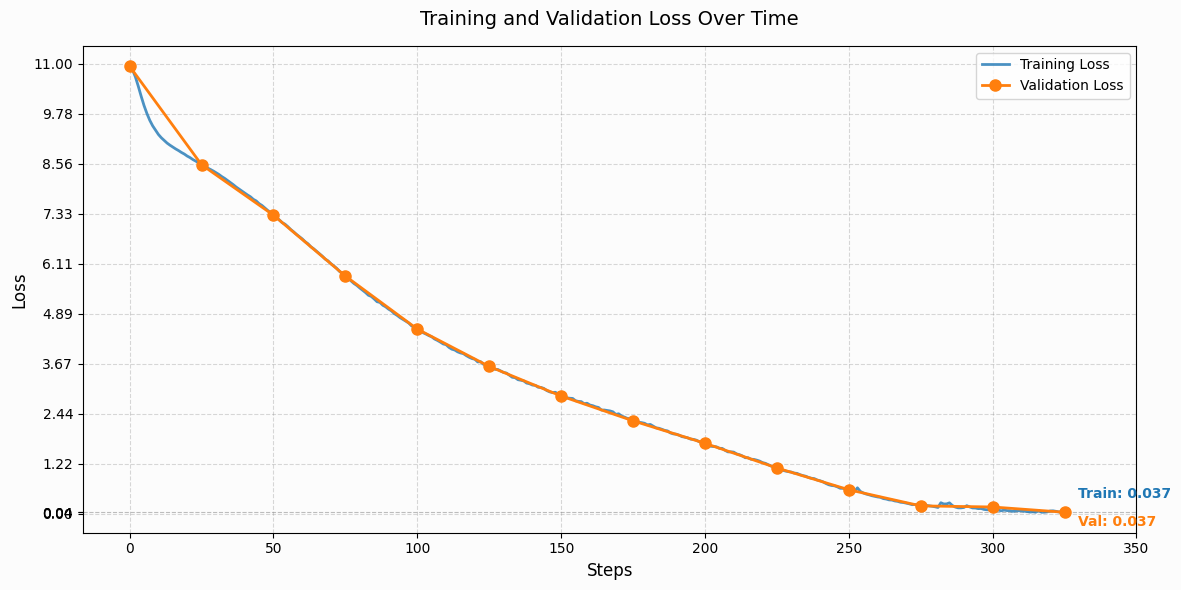

Final Training Loss: 0.0373
Final Validation Loss: 0.0372


In [ ]:

import matplotlib.pyplot as plt
import numpy as np

# Parse the log file
train_losses = []
val_losses = []
train_steps = []
val_steps = []

with open('log.txt', 'r') as f:
    for line in f:
        parts = line.strip().split()
        if len(parts) == 3:  # ['step', 'type', 'value']
            step = int(parts[0])
            loss_type = parts[1]
            loss = float(parts[2])

            if loss_type == 'train':
                train_losses.append(loss)
                train_steps.append(step)
            elif loss_type == 'val':
                val_losses.append(loss)
                val_steps.append(step)

# Create the plot with Pandas style colors
plt.figure(figsize=(12, 6))
plt.plot(train_steps, train_losses, color='#1f77b4', label='Training Loss', linewidth=2, alpha=0.8)  # Pandas blue
plt.plot(val_steps, val_losses, 'o-', color='#ff7f0e', label='Validation Loss', linewidth=2, markersize=8)  # Pandas orange

plt.xlabel('Steps', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training and Validation Loss Over Time', fontsize=14, pad=15)
plt.grid(True, linestyle='--', alpha=0.3, color='gray')
plt.legend(fontsize=10)

# Set y-axis limits with some padding and force display of endpoints
min_loss = min(min(train_losses), min(val_losses))
max_loss = max(max(train_losses), max(val_losses))
plt.ylim(min_loss - 0.5, max_loss + 0.5)

# Create more detailed y-axis ticks including the final values
final_train_loss = train_losses[-1]
final_val_loss = val_losses[-1]
yticks = np.linspace(0, int(max_loss) + 1, 10)
yticks = np.append(yticks, [final_train_loss, final_val_loss])
yticks = np.sort(np.unique(yticks))
plt.yticks(yticks, [f'{x:.2f}' for x in yticks], fontsize=10)

# Make the plot more readable
plt.xticks(np.arange(0, max(train_steps) + 50, 50), fontsize=10)

# Annotate the final values
plt.annotate(f'Train: {final_train_loss:.3f}',
            xy=(train_steps[-1], final_train_loss),
            xytext=(10, 10), textcoords='offset points',
            color='#1f77b4', fontweight='bold')

plt.annotate(f'Val: {final_val_loss:.3f}',
            xy=(val_steps[-1], final_val_loss),
            xytext=(10, -10), textcoords='offset points',
            color='#ff7f0e', fontweight='bold')

# Set the figure background color to be slightly off-white for better contrast
plt.gca().set_facecolor('#fcfcfc')
plt.gcf().set_facecolor('#fcfcfc')

# Tight layout to prevent label clipping
plt.tight_layout()

# Save the plot with a white background
plt.savefig('loss_plot.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# Print final losses
print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")

